Data Representation Notebook

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#Load TSP Dataset
df = pd.read_json('data/TSP20-data-test.json')
df_points = df['Points']
points = df_points[0]
points[:1]

[[0.0008791679, 0.7424027288],
 [0.1204685068, 0.47459528900000003],
 [0.7821261596, 0.6880915921],
 [0.3116994954, 0.719567829],
 [0.3736216093, 0.544825584],
 [0.5968701809, 0.5493358634000001],
 [0.2800536607, 0.6279356867],
 [0.2274784253, 0.5671477459],
 [0.24138916770000002, 0.1482366654],
 [0.0150713458, 0.7813774348],
 [0.7259931614, 0.18246940550000001],
 [0.1614746907, 0.8511458467],
 [0.378238479, 0.4513205187],
 [0.686811221, 0.4565766183],
 [0.1236804507, 0.2961860287],
 [0.7845488060000001, 0.2252872589],
 [0.8088127102, 0.8137724892],
 [0.11476812060000001, 0.3310364554],
 [0.2169018249, 0.4581540416],
 [0.33976851680000003, 0.40000285160000004]]

In [6]:
#Show optimal tour
df_optimal_tours = df['OptTour']
optimal_tour = df_optimal_tours[0]
optimal_tour

[0, 1, 17, 14, 8, 10, 15, 13, 2, 16, 5, 4, 12, 19, 18, 7, 6, 3, 11, 9]

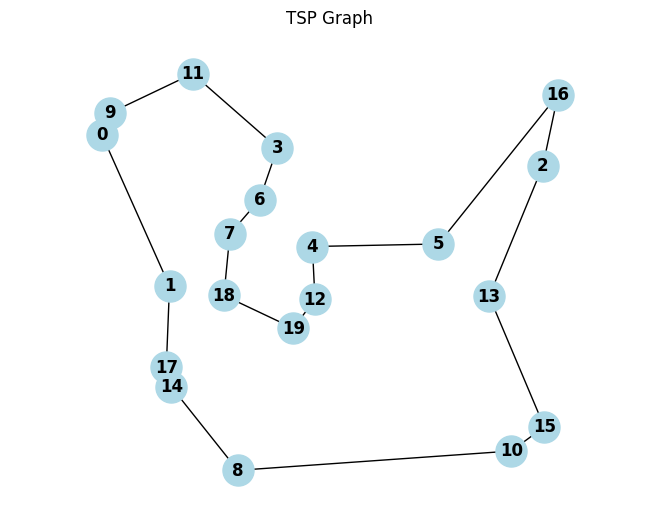

In [18]:
#Show first graph of dataframe with edges
G = nx.Graph()
for i, point in enumerate(points):
    G.add_node(i, pos=point)
for i in range(len(optimal_tour) - 1):
    node1 , node2 = optimal_tour[i], optimal_tour[i+1]
    distance = ((points[node1][0] - points[node2][0]) ** 2 + (points[node1][1] - points[node2][1]) ** 2) ** 0.5
    G.add_edge(node1, node2, distance=distance)
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("TSP Graph")
plt.axis('equal')
plt.show()